In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import time
from sklearn.svm import SVC
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
#Setting options to view whole data
pd.options.display.max_columns = 800
pd.options.display.max_rows = 800

In [3]:
#reading data
data = pd.read_csv("train.csv")

In [4]:
#Checking the number of rows & columns of the dataset
data.shape

(42000, 785)

In [5]:
#Going through the dataset
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [6]:
#Check for null values
nullCheck = pd.DataFrame(pd.isnull(data).sum(), columns = ["count_of_nulls"])
nullCheck.sort_values(by = 'count_of_nulls', ascending = False)

,count_of_nulls
label,0
pixel515,0
pixel517,0
pixel518,0
pixel519,0
pixel520,0
pixel521,0
pixel522,0
pixel523,0
pixel524,0


#### Clearly, we see that there are no null values in the given dataset

In [7]:
#Checking the label column i.e. the digits for which we have data must be from 0 to 9
data.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### Clearly, the output variable 'label' is having the correct values. Moreover, we have an overall fairly equal amount of data for each digit.

In [8]:
#Checking data in column 'pixel0'
data.pixel0.astype('category').value_counts()

0    42000
Name: pixel0, dtype: int64

#### As we see, we have 0 variance for column 'pixel10', we should remove such columns with 0 variance

In [9]:
#Let's go through the columns we have in the dataset
print(list(data.columns))

['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90',

In [10]:
#Check if column names are having any spaces
columns = list(data.columns)
filteredList = list(filter(lambda x: ' ' in x, columns))
print(len(filteredList))
print(filteredList)

0
[]


#### Thus, we don't have any column with ' ' (space) in the column name


In [11]:
#Moving on, let's check for the duplicate column names
#Converting list of columns to set would give us unique column names only.
#Thus, the length of the set should be the length of the list of column names if there are no columns with same name.
columnAsSet = set(columns)
len(columnAsSet) == len(columns)

True

Hence, we don't have any column with same name

## Do the plotting

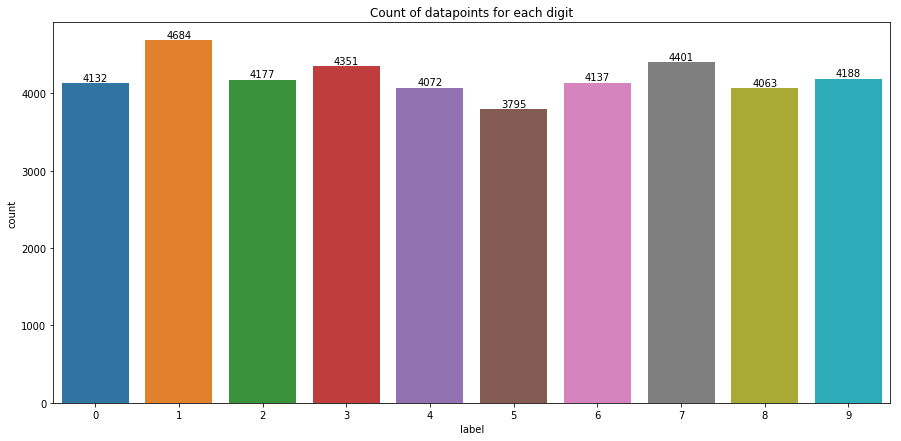

In [12]:
#Plot of count vs label
plt.figure(figsize = (15,7))
plt.title('Count of datapoints for each digit')
ax = sns.countplot(x = 'label', data = data)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+30))

#### As seen in the above graph, we have fairly equal amount of rows for each digit to be predicted.

In [13]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

Text(0.5,1,'Digit 7')

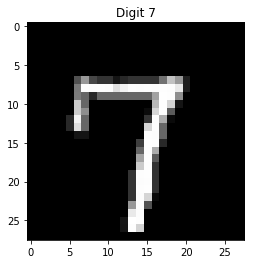

In [14]:
#Let's try to plot the given data as image of digits
seven = data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28,28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

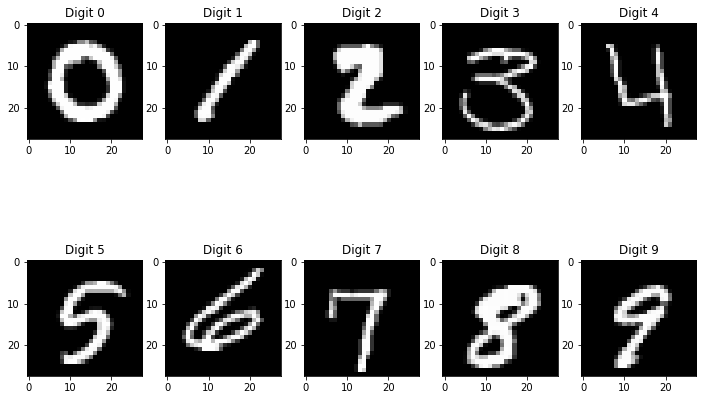

In [15]:
#Let's plot some more datapoints
plt.figure(figsize = (12,8))
listOfDigits = [0,1,2,3,4,5,6,7,8,9]
i = 2
j = 5
k = 1
for digit in listOfDigits:
    plt.subplot(i,j,k)
    dataToPlot  = data.loc[data['label']  == digit].head(1).iloc[:,1:]
    dataToPlot = dataToPlot.values.reshape(28,28)
    plt.imshow(dataToPlot, cmap = 'gray')
    plt.title("Digit " + str(digit))
    k = k+1
    

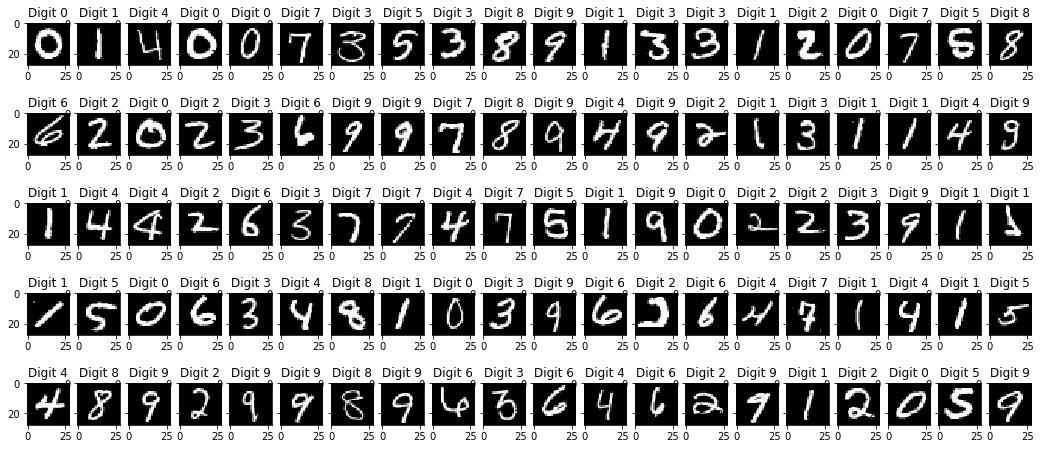

In [16]:
#Let's plot some more values
plt.figure(figsize = (18,8))
totalPlots = 100
i = 5
j = 20
k = 1
while(totalPlots>0):
    plt.subplot(i,j,k)
    dataToPlot  = data.iloc[k,1:]
    dataToPlot = dataToPlot.values.reshape(28,28)
    plt.imshow(dataToPlot, cmap = 'gray')
    plt.title("Digit " + str(data.iloc[k].label))
    k = k+1
    totalPlots = totalPlots - 1

In [17]:
#Checking variance in the columns
variance = data.var().sort_values()
variance

pixel783        0.000000
pixel673        0.000000
pixel699        0.000000
pixel700        0.000000
pixel141        0.000000
pixel727        0.000000
pixel728        0.000000
pixel729        0.000000
pixel730        0.000000
pixel57         0.000000
pixel56         0.000000
pixel55         0.000000
pixel54         0.000000
pixel53         0.000000
pixel52         0.000000
pixel731        0.000000
pixel754        0.000000
pixel755        0.000000
pixel672        0.000000
pixel671        0.000000
pixel645        0.000000
pixel644        0.000000
pixel140        0.000000
pixel139        0.000000
pixel168        0.000000
pixel196        0.000000
pixel782        0.000000
pixel392        0.000000
pixel420        0.000000
pixel421        0.000000
pixel756        0.000000
pixel112        0.000000
pixel448        0.000000
pixel476        0.000000
pixel532        0.000000
pixel560        0.000000
pixel85         0.000000
pixel84         0.000000
pixel83         0.000000
pixel82         0.000000


#### Clearly, we see a lot of columns without any variance. Let's remove the columns which do not have variance at all.

### Let's try to build the model on the given data without removing columns with 0 variance

In [18]:
#Let's split the data into X i.e. independent variables & Y i.e. dependent variable
X = data.iloc[:,1:]
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [19]:
Y = data.iloc[:,0]
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

#### As we know in any given column the values varies between 0 and 255, inclusive. There might be some columns with very less values.<br> Let's scale the independent variables

In [20]:
X_scaled = scale(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#Let's split our data into training & test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 101)

In [22]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
print("Size of training data "+str(len(y_train)))
y_train

Size of training data 29400


15388    8
38298    6
13109    5
4521     3
39509    0
36934    4
38620    9
2028     0
27070    4
20137    1
18759    6
5691     2
9649     4
19106    1
14634    6
31964    8
2114     9
15554    4
20911    4
5803     1
20081    7
25557    6
19990    4
27794    6
28981    1
34406    5
36649    9
40747    5
16591    8
21005    3
37250    2
16825    6
10044    6
23643    8
15739    2
21802    4
15840    7
39836    3
25776    3
28608    1
16313    4
2187     6
177      8
19970    6
31133    4
23674    6
30556    2
32495    7
4623     4
26830    2
1211     9
37960    9
10080    9
24432    3
3607     2
35066    6
37668    7
8583     9
417      3
39242    5
37772    4
32711    2
19986    8
20390    6
28091    7
19937    2
12227    5
11855    0
1526     9
105      8
9307     3
39334    0
33104    3
12545    6
34641    9
34012    7
23639    2
7330     4
13569    7
17501    3
32776    7
4213     6
25785    7
37490    1
33811    1
34166    7
4043     5
10997    0
36576    4
14285    3
30934    9

In [25]:
print("Size of test data "+str(len(y_test)))
y_test

Size of test data 12600


20209    1
7136     3
17339    0
37117    0
22572    1
3652     9
31974    1
39025    5
14668    0
14004    6
8047     7
31416    9
11758    5
23220    2
6626     6
14722    7
20508    1
32244    5
41659    1
26144    5
23927    0
8921     4
14206    3
30861    0
22687    1
23305    2
19550    8
708      1
8572     6
35303    9
23924    9
36134    1
37920    5
41183    6
34340    1
6497     0
28759    8
36878    5
9366     1
37507    6
18046    7
26814    3
8110     2
39505    9
18164    2
14134    5
24108    6
18100    1
12378    1
19829    4
38213    4
26678    2
27438    8
34909    1
26117    9
12858    6
6079     0
12556    1
34207    2
39555    3
21205    5
11716    9
3197     2
4125     5
18581    9
30367    5
24380    0
14139    6
33455    8
40600    5
6419     4
11858    2
7700     7
32194    4
37786    5
1682     9
11940    2
2889     1
23236    3
31778    3
11497    3
2988     6
2162     4
27310    3
41442    4
8191     2
744      9
9771     0
3968     5
19447    2
19484    1

In [26]:
# #model training & prediction
# start_time = time.time()
# #model 
# linear_model = SVC(kernel = 'linear')

# #fit
# linear_model.fit(X_train, y_train)

# #predict
# y_pred = linear_model.predict(X_test)
# print("Total execution time "+str(time.time() - start_time))

In [27]:
# print("Accuracy: ",metrics.accuracy_score(y_true = y_test, y_pred = y_pred)*100,"%")

#### The time being taken for training when kernel is linear is 177 seconds i.e. 2.95 minutes. <br>So, we got an accuracy of 91.7% by training a linear SVM model with 70% of the given training set. Let's try a non-linear model

In [28]:
# # SVM with polynomial kernel

# start_time = time.time()

# #model
# polynomial_model = SVC(kernel = 'poly')

# #fit
# polynomial_model.fit(X_train, y_train)

# #predict
# y_pred = polynomial_model.predict(X_test)
# print("Total excecution time: ",time.time()-start_time)

##### The polynomial kernel is running for 1094 seconds i.e. more than 18 minutes

In [29]:
# from sklearn import metrics
# # confusion matrix and accuracy
# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# # cm
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


##### The accuracy from polynomial kernel is 94.11 %

In [30]:
#Model building using RBF Kernel
# start = time.time()
# #model
# non_linear_model = SVC(kernel = "rbf")

# #fit
# non_linear_model.fit(X_train, y_train)

# #predict
# y_pred = non_linear_model.predict(X_test)

# print(time.time() - start)

##### RBF Kernel runs for 570 seconds i.e. 9.5 minutes

In [31]:
# # confusion matrix and accuracy for RBF model

# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# # cm
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

##### The accuracy for RBF model is 95.93%

### Although the best accuracy has been achieved with RBF Kernel but the computation time is huge, Let's decrease the training data and see the effect on computation time

#### Let's remove the unnecessary columns with 0 variance and see if the execution time improves

In [32]:
varianceInColumns = pd.DataFrame(X.var()).reset_index()
varianceInColumns.columns = ['columnName','variance']
varianceInColumns

,columnName,variance
0,pixel0,0.000000
1,pixel1,0.000000
2,pixel2,0.000000
3,pixel3,0.000000
4,pixel4,0.000000
5,pixel5,0.000000
6,pixel6,0.000000
7,pixel7,0.000000
8,pixel8,0.000000
9,pixel9,0.000000


In [33]:
#Filtering columns whose variance is 0
columnsToRemove = varianceInColumns.loc[varianceInColumns['variance'] == 0]
columnsToRemove

,columnName,variance
0,pixel0,0.0
1,pixel1,0.0
2,pixel2,0.0
3,pixel3,0.0
4,pixel4,0.0
5,pixel5,0.0
6,pixel6,0.0
7,pixel7,0.0
8,pixel8,0.0
9,pixel9,0.0


In [34]:
#Get the number of columns to remove
len(columnsToRemove)

76

So, we got a pretty good number to make our dataset more concise

In [35]:
#Dropping the columns with 0 variance
cleaned_data = data.drop(columnsToRemove.columnName, axis = 1)

In [36]:
#Checking the shape
cleaned_data.shape

(42000, 709)

In [37]:
#Checking the data
cleaned_data.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel

#### Now, let's prepare our model again on the new dataset

In [38]:
#Splitting our data into x & y
X = cleaned_data.drop('label',axis = 1)
Y = cleaned_data['label']

In [39]:
X.head()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500,pi

In [40]:
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [41]:
#Let's scale the training dataset
X_scaled = scale(X)
X_scaled

array([[-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699],
       [-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699],
       [-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699],
       ...,
       [-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699],
       [-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699],
       [-0.00528064, -0.00687837, -0.00487956, ..., -0.01147285,
        -0.00909914, -0.00689699]])

In [42]:
#Length of the dataset must be 42000
len(X_scaled)

42000

In [43]:
#Let's split the data into test & train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 101)

In [44]:
#Number of datapoints in the training set
len(X_train)

29400

### Model building with the cleaned dataset

In [45]:
# from sklearn.svm import SVC

# start = time.time()
# #model
# model_linear = SVC(kernel = 'linear')

# #fit
# model_linear.fit(X_train, y_train)

# # predict
# y_pred = model_linear.predict(X_test)

# print(time.time() - start)

#### The time taken to build the model is 175 seconds i.e. 2.91 minutes which is almost comparable to the time required to build the model without removing the columns which have 0 variance

#### Let's reduce our training dataset further to reduce the computation time

In [46]:
# from sklearn import metrics
# # confusion matrix and accuracy

# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# # cm
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

#### So, there was no accuracy drop which is ideal after removing the columns with 0 variance i.e. we still have accuracy of 91.7% by training a linear SVM model on the given training set. <br> But we need to do something about the computation time, let's reduce the training dataset and see

In [47]:
#Splitting the data into two halves, one for train & the other for test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.7, random_state = 101)

In [48]:
# #Let's rebuild the linear model with 50% of training data
# start_time = time.time()

# #model
# linear_model = SVC(kernel = 'linear')

# #fit
# linear_model.fit(X_train,y_train)

# #predict
# y_pred = linear_model.predict(X_test)

# print("Total execution time: ", time.time() - start_time)

#### The total execution time now comes out to be 138 seconds which is 2.3 minutes and pretty good as compared to the time taken to train from 70% dataset

In [49]:
# #Accuracy

# metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

In [50]:
#The model accuracy with linear kernel comes out to be 91.4%

#### Let's try to train our model using only 20% of the dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.8, random_state = 101)

In [52]:
# # Training model with 20% data
# start_time = time.time()
# #model 
# linear_model = SVC(kernel = 'linear')

# #fit
# linear_model.fit(X_train, y_train)

# #predict
# y_pred = linear_model.predict(X_test)
# print("Total Execution time: ", time.time() - start_time)

#### The total execution time comes out to be 117 seconds i.e. 1.95 minutes with model being trained on only 20% of the dataset.

In [53]:
# #Checking accuracy on the model trained with only 20% of the dataset
# metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

#### The accuracy achieved is quite good i.e. 91.3% and not much decrease is seen as compared to the training on the 30% of the dataset which was 91.4%

#### The gridSearchCV is taking a lot of time to run, let's remove the columns with least variance. Let's remove columns with least variance


In [54]:
cleaned_data.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel

In [55]:
varianceInColumns = pd.DataFrame(X.var()).reset_index()
varianceInColumns.columns = ['columnName','variance']
varianceInColumns.sort_values(by = 'variance')

,columnName,variance
125,pixel169,0.000381
3,pixel15,0.001929
565,pixel617,0.002762
4,pixel32,0.006095
124,pixel167,0.007714
687,pixel752,0.019476
25,pixel59,0.020024
564,pixel616,0.022881
536,pixel588,0.024381
319,pixel364,0.024381


In [56]:
#Let's take top 30% columns that is top 30 columns with highest variance
varianceInColumns.variance.quantile(0.7)

9306.267981063509

In [57]:
#List of columns to drop to keep top 30% columns with high variance
columnsToDrop = list(varianceInColumns.loc[varianceInColumns['variance']<9306].columnName)
columnsToDrop

['pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel86',
 'pixel87',
 'pixel88',
 'pixel89',
 'pixel90',
 'pixel91',
 'pixel92',
 'pixel93',
 'pixel94',
 'pixel95',
 'pixel96',
 'pixel97',
 'pixel98',
 'pixel99',
 'pixel100',
 'pixel101',
 'pixel102',
 'pixel103',
 'pixel104',
 'pixel105',
 'pixel106',
 'pixel107',
 'pixel108',
 'pixel109',
 'pixel110',
 'pixel113',
 'pixel114',
 'pixel115',
 'pixel116',
 'pixel117',
 'pixel118',
 'pixel119',
 'pixel120',
 'pixel12

In [58]:
#Dropping the 70% least variance columns
highVarianceData = cleaned_data.drop(columnsToDrop, axis = 1)
highVarianceData.head()

,label,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel512,pixel513,pixel514,pixel515,pixel516,pixel517,pixel518,pixel519,pixel520,pixel521,pixel522,pixel523,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,123,248,0,0,0,0,0,0,0,80,247,253,208,0,0,0,0,0,0,0,29,207,253,235,77,0,0,0,0,0,0,54,209,253,253,88,0,0,0,0,0,0,0,93,254,253,238,170,17,0,0,0,0,0,0,23,210,254,253,159,0,0,0,0,0,0,0,16,209,253,254,240,81,0,0,0,0,0,0,27,253,253,254,13,0,0,0,0,0,0,20,206,254,254,198,7,0,0,0,0,0,0,168,253,253,196,7,0,0,0,0,0,0,20,203,253,248,76,0,0,0,0,0,0,0,22,188,253,245,93,0,0,0,0,0,0,0,0,103,253,253,191,0,0,0,0,0,0,0,89,240,253,195,25,0,0,0,0,0,0,0,220,253,253,80,0,0,0,0,0,0,0,0,253,253,253,94,0,0,0,0,0,0,0,251,253,250,131,0,0,0,0,0,0,95,0,0,0,0,0
1,0,254,254,217,246,151,32,254,254,254,254,254,254,254,231,54,254,254,254,254,254,254,254,254,254,254,104,254,254,254,254,109,83,199,254,254,254,254,243,254,202,147,147,45,0,11,29,200,254,254,254,254,89,67,0,0,0,0,0,0,128,252,254,254,254,29,0,0,0,0,0,0,0,0,83,254,254,240,24,0,0,0,0,0,0,0,0,25,240,186,7,0,0,0,0,0,0,0,0,0,166,254,29,0,0,0,0,0,0,0,0,0,75,254,29,0,0,0,0,0,0,0,0,0,48,254,29,0,0,0,0,0,0,0,0,0,48,254,254,200,12,0,0,0,0,0,0,0,16,209,254,254,254,202,66,0,0,0,0,0,21,161,254,254,254,254,194,48,48,34,41,48,209,254,254,243,254,254,254,254,254,233,243,254,254,254,254,114,254,254,254,254,254,254,254,254,254,254,13,182,254,254,254,254,254,254,254,254,76,146,254,255,254,255
2,1,254,254,8,0,0,0,0,9,254,254,8,0,0,0,0,0,0,9,254,254,106,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,6,185,254,184,0,0,0,0,0,0,0,0,0,0,89,254,184,0,0,0,0,0,0,0,0,4,146,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,156,254,254,184,0,0,0,0,0,0,0,0,185,255,255,184,0,0,0,0,0,0,0,0,185,254,254,184,0,0,0,0,0,0,0,185,254,254,184,0,0,0,0,63,254,254,62
3,4,0,0,0,0,9,77,0,0,0,0,0,0,27,202,0,0,0,0,0,0,0,0,27,254,63,0,6,0,0,0,0,0,0,0,27,254,65,0,21,0,0,0,0,0,0,0,20,239,65,0,254,21,0,0,0,0,0,0,0,0,195,65,0,254,21,0,0,0,0,0,0,0,0,195,142,0,251,21,0,0,0,0,0,0,0,0,195,227,222,153,5,0,0,0,0,0,0,0,120,240,67,251,40,0,0,0,0,0,0,0,94,255,

In [59]:
#Checking shape of new dataset
highVarianceData.shape

(42000, 214)

In [60]:
#Splitting data into X & Y
X  = highVarianceData.iloc[:,1:]
Y = highVarianceData.iloc[:,0]

In [61]:
X.head()

,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel512,pixel513,pixel514,pixel515,pixel516,pixel517,pixel518,pixel519,pixel520,pixel521,pixel522,pixel523,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659
0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,248,0,0,0,0,0,0,0,80,247,253,208,0,0,0,0,0,0,0,29,207,253,235,77,0,0,0,0,0,0,54,209,253,253,88,0,0,0,0,0,0,0,93,254,253,238,170,17,0,0,0,0,0,0,23,210,254,253,159,0,0,0,0,0,0,0,16,209,253,254,240,81,0,0,0,0,0,0,27,253,253,254,13,0,0,0,0,0,0,20,206,254,254,198,7,0,0,0,0,0,0,168,253,253,196,7,0,0,0,0,0,0,20,203,253,248,76,0,0,0,0,0,0,0,22,188,253,245,93,0,0,0,0,0,0,0,0,103,253,253,191,0,0,0,0,0,0,0,89,240,253,195,25,0,0,0,0,0,0,0,220,253,253,80,0,0,0,0,0,0,0,0,253,253,253,94,0,0,0,0,0,0,0,251,253,250,131,0,0,0,0,0,0,95,0,0,0,0,0
1,254,254,217,246,151,32,254,254,254,254,254,254,254,231,54,254,254,254,254,254,254,254,254,254,254,104,254,254,254,254,109,83,199,254,254,254,254,243,254,202,147,147,45,0,11,29,200,254,254,254,254,89,67,0,0,0,0,0,0,128,252,254,254,254,29,0,0,0,0,0,0,0,0,83,254,254,240,24,0,0,0,0,0,0,0,0,25,240,186,7,0,0,0,0,0,0,0,0,0,166,254,29,0,0,0,0,0,0,0,0,0,75,254,29,0,0,0,0,0,0,0,0,0,48,254,29,0,0,0,0,0,0,0,0,0,48,254,254,200,12,0,0,0,0,0,0,0,16,209,254,254,254,202,66,0,0,0,0,0,21,161,254,254,254,254,194,48,48,34,41,48,209,254,254,243,254,254,254,254,254,233,243,254,254,254,254,114,254,254,254,254,254,254,254,254,254,254,13,182,254,254,254,254,254,254,254,254,76,146,254,255,254,255
2,254,254,8,0,0,0,0,9,254,254,8,0,0,0,0,0,0,9,254,254,106,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,6,185,254,184,0,0,0,0,0,0,0,0,0,0,89,254,184,0,0,0,0,0,0,0,0,4,146,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,156,254,254,184,0,0,0,0,0,0,0,0,185,255,255,184,0,0,0,0,0,0,0,0,185,254,254,184,0,0,0,0,0,0,0,185,254,254,184,0,0,0,0,63,254,254,62
3,0,0,0,0,9,77,0,0,0,0,0,0,27,202,0,0,0,0,0,0,0,0,27,254,63,0,6,0,0,0,0,0,0,0,27,254,65,0,21,0,0,0,0,0,0,0,20,239,65,0,254,21,0,0,0,0,0,0,0,0,195,65,0,254,21,0,0,0,0,0,0,0,0,195,142,0,251,21,0,0,0,0,0,0,0,0,195,227,222,153,5,0,0,0,0,0,0,0,120,240,67,251,40,0,0,0,0,0,0,0,94,255,0,234,184,0,0,

In [62]:
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [63]:
#Let's scale the data
X_scaled = scale(X)
X_scaled

array([[-0.72482929, -0.80296513, -0.84188749, ..., -0.9056254 ,
        -0.84747431, -0.7405756 ],
       [ 1.72957996,  1.56043741,  1.1527985 , ...,  1.40791459,
         1.50317931,  1.72898127],
       [ 1.72957996,  1.56043741, -0.76835068, ...,  1.39884188,
         1.50317931, -0.14013432],
       ...,
       [-0.72482929, -0.80296513, -0.84188749, ...,  1.40791459,
         1.51243385,  1.10917092],
       [-0.72482929, -0.5517373 ,  1.48371415, ..., -0.9056254 ,
        -0.84747431, -0.7405756 ],
       [-0.72482929, -0.80296513, -0.84188749, ..., -0.9056254 ,
        -0.84747431,  0.22787807]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 101)

In [65]:
#Let's build the linear model again

start_time = time.time()

#model
linear_model = SVC(kernel = 'linear')

#fit
linear_model.fit(X_train, y_train)

#predict
y_pred = linear_model.predict(X_test)

print("Total execution time: ", time.time()  - start_time)

Total execution time:  154.5021367073059


#### The execution time for linear kernel is 154 seconds i.e. 2.56 minutes

In [66]:
#Accuracy

metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

0.9027777777777778

#### Accuracy that we get from the linear kernel model after taking top 30% columns (according to variance) gives us 90.2% accuracy

In [67]:
#Let's try to build a model with polynomial Kernel

start_time = time.time()
#model
non_linear_model = SVC(kernel = 'poly', degree = 2)

#fit
non_linear_model.fit(X_train, y_train)

#predict
y_pred = non_linear_model.predict(X_test)

print("Total execution time: ",time.time() - start_time)

Total execution time:  92.83237648010254


#### The total execution time for polynomial kernel is 92 seconds i.e. 1.5 minutes

In [68]:
#Let's check the accuracy of the model with polynomial kernel
metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

0.9715079365079365

### As we see the accuracy we get from Polynomial kernel is 97.1% which is the best accuracy that we get till now.


In [70]:
#### Let's try a polynomial model with degree 3

start_time = time.time()
#model
non_linear_model = SVC(kernel = 'poly', degree = 3)

#fit
non_linear_model.fit(X_train, y_train)

#predict
y_pred = non_linear_model.predict(X_test)

print("Total execution time: ",time.time() - start_time)

Total execution time:  114.86347460746765


#### Let's check the accuracy of the model with polynomial kernel

metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

#### We got an accuracy of 97.6% with polynomial kernel of degree 3 but its only 0.5% increase with degree increse from 2 to 3, we would prefer the degree 2 model

In [72]:
#### Let's try a polynomial model with degree 4

start_time = time.time()
#model
non_linear_model = SVC(kernel = 'poly', degree = 4)

#fit
non_linear_model.fit(X_train, y_train)

#predict
y_pred = non_linear_model.predict(X_test)

print("Total execution time: ",time.time() - start_time)

Total execution time:  174.44989609718323


In [73]:
#Let's check the accuracy of the model with polynomial kernel
metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

0.9734920634920635

#### As we see, the accuracy has indeed decreased. Thus, polynomial kernel with degree 2 is our best model so far.m

In [75]:
#### Let's try a rbf kernel

start_time = time.time()
#model
non_linear_model = SVC(kernel = 'rbf')

#fit
non_linear_model.fit(X_train, y_train)

#predict
y_pred = non_linear_model.predict(X_test)

print("Total execution time: ",time.time() - start_time)

Total execution time:  81.47857594490051


In [76]:
#Let's check the accuracy of the model with polynomial kernel
metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

0.9723015873015873

## Again, the accuracy is not improving much as compared to the model with polynomial kernel at degree 2. Thus, our polynomial model with degree 2 is the best model we've created.

#### Let's tune the model by changing Hyperparameters

In [78]:
# creating a KFold object with 5 splits 
start_time = time.time()
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="poly", degree = 2)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)                  
print("Total execution time: ", time.time() - start_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 35.2min finished


Total execution time:  2172.0636122226715


In [79]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.749348,0.189147,22.597491,0.247564,1,0.01,"{'C': 1, 'gamma': 0.01}",0.968163,0.966224,0.961020,0.965136,0.003016,1,0.998980,0.998980,0.999133,0.999031,0.000072
1,137.857868,1.462688,46.333960,0.269423,1,0.001,"{'C': 1, 'gamma': 0.001}",0.929388,0.928061,0.926020,0.927823,0.001385,9,0.933827,0.935714,0.935153,0.934898,0.000792
2,355.653129,10.775204,77.260603,4.032741,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.113367,0.110612,0.108878,0.110952,0.001849,12,0.109745,0.111122,0.111990,0.110952,0.000924
3,44.539585,0.843696,24.513573,0.872410,10,0.01,"{'C': 10, 'gamma': 0.01}",0.968265,0.965102,0.960918,0.964762,0.003009,3,1.000000,1.000000,1.000000,1.000000,0.000000
4,58.647307,5.453987,26.383826,1.065430,10,0.001,"{'C': 10, 'gamma': 0.001}",0.962551,0.959286,0.955612,0.959150,0.002834,7,0.977500,0.976939,0.980204,0.978214,0.001426
5,303.653596,1.217749,67.254806,0.549614,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.680000,0.715918,0.765408,0.720442,0.035014,11,0.699286,0.715408,0.771939,0.728878,0.031152
6,40.020304,1.084306,22.408074,0.698841,100,0.01,"{'C': 100, 'gamma': 0.01}",0.968265,0.965102,0.960918,0.964762,0.003009,3,1.000000,1.000000,1.000000,1.000000,0.000000
7,39.050233,0.672225,23.081273,1.281871,100,0.001,"{'C': 100, 'gamma': 0.001}",0.968163,0.966224,0.961020,0.965136,0.003016,1,0.998980,0.998980,0.999133,0.999031,0.000072
8,169.588797,8.040290,57.069710,0.103423,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929388,0.928061,0.926020,0.927823,0.001385,9,0.933827,0.935714,0.935153,0.934898,0.000792
9,51.968686,4.708759,28.799315,0.412501,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.968265,0.965102,0.960918,0.964762,0.003009,3,1.000000,1.000000,1.000000,1.000000,0.000000


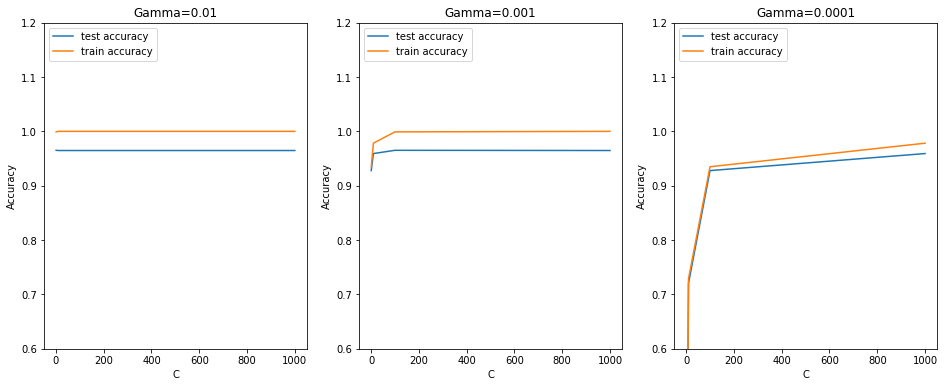

In [82]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')


In [83]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9651360544217688 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


In [84]:
#Building the final model
#Let's try to build a model with polynomial Kernel

start_time = time.time()
#model
non_linear_model = SVC(kernel = 'poly', degree = 2, C = 1, gamma = 0.01)

#fit
non_linear_model.fit(X_train, y_train)

#predict
y_pred = non_linear_model.predict(X_test)

print("Total execution time: ",time.time() - start_time)

Total execution time:  186.77259850502014


In [85]:
#Let's check the accuracy of the model with polynomial kernel
metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

0.972936507936508

In [86]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")

[[1196    0    6    0    1    1    3    0    4    2]
 [   2 1403    9    0    3    0    1    3    1    0]
 [   3    3 1223    4    8    0    2   10    3    2]
 [   2    0   20 1226    0   18    3    3    5    7]
 [   3    2    5    3 1185    0    3    0    0    8]
 [   2    1    3   12    1 1083    9    0    4    6]
 [   4    0    0    2    1    5 1227    0    3    0]
 [   1    2   14    2   11    0    0 1272    1   12]
 [   3    1   11   10    2    1    4    2 1191    2]
 [   6    2    4    7   14    8    2    5    8 1253]] 



#### The accuracy that we get is 97.2% for the final model using polynomial kernel with degree 2. 